# Dataset analysis

In [3]:
for i in range (10):
  print(i)

0
1
2
3
4
5
6
7
8
9


Let us import the required modeules and the dataset

In [ ]:
import json
from collections import Counter
import functools
import operator
import numpy as np                                                               
import matplotlib.pyplot as plt
import pandas as pd
import sys

path_dir = "D:\\Drive\\HumanLanguageTechnologies\\BioASQ2020\\utils"

if path_dir not in sys.path:
    sys.path.append(path_dir)

from data import load_data_yesno, generate_embeddings_yesno, generate_embeddings_yesno_pooling, load_embeddings, load_data

In [ ]:
with open("../../data/training8b.json") as json_file:
  dataset = json.load(json_file)
  
questions = dataset["questions"]

## Counting question types

In [ ]:
types = [q["type"] for q in questions]
set(types)

{'factoid', 'list', 'summary', 'yesno'}

In [ ]:
yesNoAnswers = [q["exact_answer"] for q in dataset["questions"] if q["type"]=="yesno"]
listAnswers = [q["exact_answer"] for q in dataset["questions"] if q["type"]=="list"]
factoidAnswers = [q["exact_answer"] for q in dataset["questions"] if q["type"]=="factoid"]
summaryAnswers = [q["ideal_answer"] for q in dataset["questions"] if q["type"]=="summary"]

answers = [yesNoAnswers, listAnswers, factoidAnswers, summaryAnswers]

In [ ]:
def foldr_len(l):
  if l == []:
    return 0
  return len(l[0]) + foldr_len(l[1:])

In [ ]:
foldr_len(answers) == len(questions)

True

### Plotting types

([<matplotlib.axis.YTick at 0x7fb4a56b3c50>,
 <a list of 4 Text major ticklabel objects>)

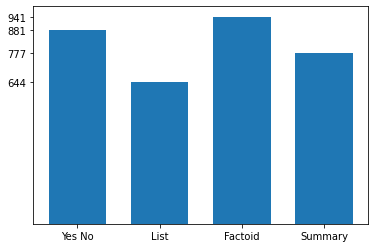

In [ ]:
top=[('Yes No', len(answers[0])), ('List',len(answers[1])),('Factoid',len(answers[2])), ('Summary',len(answers[3]))]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 0.7

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels)
plt.yticks(ys)

## YesNo distribution

Target distribution

In [ ]:
c = Counter(yesNoAnswers) # Counter

print(c.keys())
print(c.values())

dict_keys(['yes', 'no'])
dict_values([704, 177])


Yes no distribution with single snippets

In [ ]:
yesNoSingle = load_data("/content/drive/My Drive/HumanLanguageTechnologies/BioASQ2020/data/training8b.json", "yesno", True)

In [ ]:
yesNoSingleAns = [q["exact_answer"] for q in yesNoSingle]

c = Counter(yesNoSingleAns) # Counter

print(c.keys())
print(c.values())

dict_keys(['yes', 'no'])
dict_values([10285, 1691])


## Average list values for list type answers

In [ ]:
items = 0
answers = 0

for answer in listAnswers:
  items += len(answer)
  answers += 1

print(items/answers)

4.90527950310559


## Number and average of snippets per question type

In [ ]:
def countSnippets(questions):
  counter = [len(list(q["snippets"])) for q in questions]
  return sum(counter)

In [ ]:
yesNoQuestions = [q for q in dataset["questions"] if q["type"]=="yesno"]
listQuestions = [q for q in dataset["questions"] if q["type"]=="list"]
factoidQuestions = [q for q in dataset["questions"] if q["type"]=="factoid"]
summaryQuestions = [q for q in dataset["questions"] if q["type"]=="summary"]

questions = [yesNoQuestions, listQuestions, factoidQuestions, summaryQuestions]
questionTypes = ["Yes no", "List", "Factoid", "Summary"]

snippets_count = []
for questionType in questions:
  snippets_count.append(countSnippets(questionType))

for i in range(len(questionTypes)):
  print(str(questionTypes[i]) +": " + str(snippets_count[i]) + " snippets, " + str(len(questions[i])) + " questions: " + str(snippets_count[i]/len(questions[i])) + " on average")

Yes no: 11976 snippets, 881 questions: 13.593643586833144 on average
List: 8836 snippets, 644 questions: 13.720496894409937 on average
Factoid: 11633 snippets, 941 questions: 12.362380446333688 on average
Summary: 9470 snippets, 777 questions: 12.187902187902187 on average


## Average question length per question type

In [ ]:
questionLengths = []

for questionType in questions:
  questionsN = 0
  questionsL = 0
  for question in questionType:
    questionsL += len(question["body"])
    questionsN += 1
  
  questionLengths.append(questionsL/questionsN)

questionLengths
# Yes No, List, Factoid, Summary

[61.34733257661748, 64.16304347826087, 60.66312433581297, 51.422136422136425]

## Number of papers

In [ ]:
urls = pd.read_csv("/content/drive/My Drive/HumanLanguageTechnologies/BioASQ2020/data/urls.csv")
len(urls)

31153